In [20]:
import pandas as pd
import csv
import json
import numpy as np
from census import Census
import requests
from us import states
import scipy.stats as sts
from matplotlib import pyplot as plt

In [21]:
#Reading in 2019 Accidents CSV
file_path = 'final_accident_df.csv'
accident_df = pd.read_csv(file_path)
us_total_accidents = accident_df['Date'].count()

In [22]:
#Sorting Accident_df into seasons (spring, summer, fall, winter)
spring_dates_df = accident_df[(accident_df['Date'] >= '2019-03-01') & (accident_df['Date'] <= '2019-05-31')]
us_spring = spring_dates_df['Date'].count()
summer_dates_df = accident_df[(accident_df['Date'] >= '2019-06-01') & (accident_df['Date'] <= '2019-08-31')]
us_summer = summer_dates_df['Date'].count()
fall_dates_df = accident_df[(accident_df['Date'] >= '2019-09-01') & (accident_df['Date'] <= '2019-11-31')]
us_fall = fall_dates_df['Date'].count()
winter_dates_1 = accident_df[(accident_df['Date'] >= '2019-12-01') & (accident_df['Date'] <= '2019-12-31')]
winter_dates_2 = accident_df[(accident_df['Date'] >= '2019-01-01') & (accident_df['Date'] <= '2019-02-28')]
winter = winter_dates_1.append(winter_dates_2)
winter = winter.sort_values(by='Date', ascending=True)
us_winter = winter['Date'].count()

In [23]:
#TX TOTAL DataFrame
tx_total = accident_df.loc[accident_df.State == 'TX', :]
tx_total_accidents = tx_total['Date'].count()
tx_total_pct = (tx_total_accidents / us_total_accidents) * 100


In [24]:
#TX SPRING DataFrame
tx_spring = spring_dates_df.loc[spring_dates_df.State == 'TX', : ]
tx_spring_accidents = tx_spring['Date'].count()
tx_spring_pct = (tx_spring_accidents / tx_total_accidents) * 100

In [25]:
#TX SUMMER DataFrame
tx_summer = summer_dates_df.loc[summer_dates_df.State == 'TX', :]
tx_summer_accidents = tx_summer['Date'].count()
tx_summer_pct = (tx_summer_accidents / tx_total_accidents) * 100

In [26]:
#TX FALL DataFrame
tx_fall = fall_dates_df.loc[fall_dates_df.State == 'TX', :]
tx_fall_accidents = tx_fall['Date'].count()
tx_fall_pct = (tx_fall_accidents / tx_total_accidents) * 100

In [27]:
#TX WINTER DataFrame
tx_winter = winter.loc[winter.State == 'TX', :]
tx_winter_accidents = tx_winter['Date'].count()
tx_winter_pct = (tx_winter_accidents / tx_total_accidents) * 100

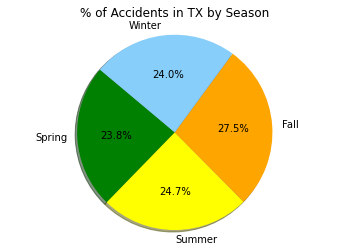

<Figure size 7200x7200 with 0 Axes>

In [28]:
# % of Accidents in Texas per Season (pie chart)
label = ['Spring', 'Summer', 'Fall', 'Winter']
totals = [tx_spring_pct, tx_summer_pct, tx_fall_pct, tx_winter_pct]
colors = ['green', 'yellow', 'orange', 'lightskyblue']

plt.pie(totals, labels = label,colors = colors, autopct="%1.1f%%", shadow=True, startangle = 140)
plt.title('% of Accidents in TX by Season')
plt.axis("equal")
fig = plt.figure(figsize=(100,100))
plt.show()

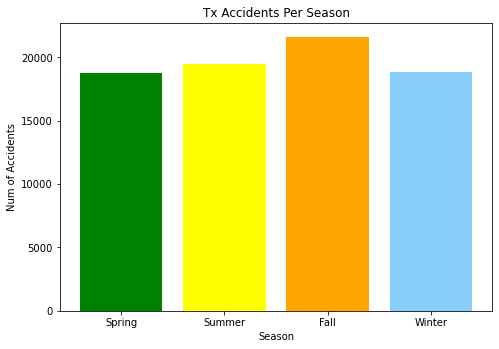

In [29]:
# # of Accidents in Texas per Season (bar chart)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Spring', 'Summer', 'Fall', 'Winter']
totals = [tx_spring_accidents, tx_summer_accidents, tx_fall_accidents, tx_winter_accidents]
colors = ['green', 'yellow', 'orange', 'lightskyblue']
plt.title('Tx Accidents Per Season')
plt.xlabel('Season')
plt.ylabel('Num of Accidents')
ax.bar(label,totals, color = colors)
plt.show()

In [30]:
# plt.scatter(accident_df["Visibility(mi)"], accident_["City"], marker="+", s=15, color = 'red', alpha = 0.5)

# plt.title("City Latitude vs. Wind Speed")
# plt.ylabel("Wind Speed (mph)")
# plt.xlabel("Latitude")
# plt.grid(True)
# plt.savefig('cityvswindspeed')
# plt.show()
accident_df['Visibility(mi)']

0         10.0
1         10.0
2          7.0
3          7.0
4         10.0
          ... 
953728    10.0
953729    10.0
953730    10.0
953731    10.0
953732     7.0
Name: Visibility(mi), Length: 953733, dtype: float64

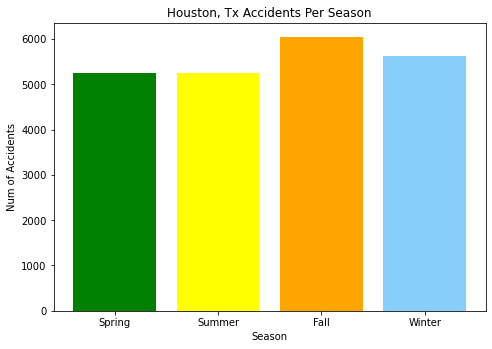

In [31]:
# of Accidents in Houston,Tx per Season (bar chart)
tx_total['City'].value_counts()
#Houston 22168
houston_df = tx_total[(tx_total['City'] == 'Houston')]
htown_total = houston_df['Date'].count()
htown_spring_dates_df = houston_df[(houston_df['Date'] >= '2019-03-01') & (houston_df['Date'] <= '2019-05-31')]
htown_summer_dates_df = houston_df[(houston_df['Date'] >= '2019-06-01') & (houston_df['Date'] <= '2019-08-31')]
htown_fall_dates_df = houston_df[(houston_df['Date'] >= '2019-09-01') & (houston_df['Date'] <= '2019-11-31')]
htown_winter_dates_1 = houston_df[(houston_df['Date'] >= '2019-12-01') & (houston_df['Date'] <= '2019-12-31')]
htown_winter_dates_2 = houston_df[(houston_df['Date'] >= '2019-01-01') & (houston_df['Date'] <= '2019-02-28')]
htown_winter = htown_winter_dates_1.append(htown_winter_dates_2)
htown_winter = htown_winter.sort_values(by='Date', ascending=True)
htown_spring_total = htown_spring_dates_df['Date'].count()
htown_summer_total = htown_summer_dates_df['Date'].count()
htown_fall_total = htown_fall_dates_df['Date'].count()
htown_winter_total = htown_winter['Date'].count()
htown_winter_pct = (htown_winter_total / htown_total) * 100
htown_spring_pct = (htown_spring_total / htown_total) * 100
htown_summer_pct = (htown_summer_total / htown_total) * 100
htown_fall_pct = (htown_fall_total / htown_total) * 100

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Spring', 'Summer', 'Fall', 'Winter']
totals = [htown_spring_total, htown_summer_total, htown_fall_total, htown_winter_total]
colors = ['green', 'yellow', 'orange', 'lightskyblue']
plt.title('Houston, Tx Accidents Per Season')
plt.xlabel('Season')
plt.ylabel('Num of Accidents')
ax.bar(label,totals, color = colors)
plt.show()

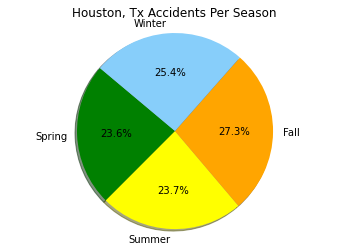

<Figure size 7200x7200 with 0 Axes>

In [32]:
# % of Accidents in Houston, Tx per Season (pie chart)
label = ['Spring', 'Summer', 'Fall', 'Winter']
totals = [htown_spring_pct, htown_summer_pct, htown_fall_pct, htown_winter_pct]
colors = ['green', 'yellow', 'orange', 'lightskyblue']

plt.pie(totals, labels = label,colors = colors, autopct="%1.1f%%", shadow=True, startangle = 140)
plt.title('% of Accidents in TX by Season')
plt.axis("equal")
plt.title('Houston, Tx Accidents Per Season')
fig = plt.figure(figsize=(100,100))
plt.show()

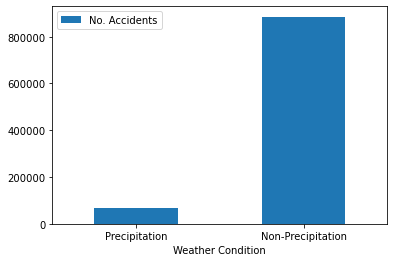

In [33]:
#2019 total US accidents Precipitation / Non-Precipitation bar graph
accident_df['Precipitation(in)'] = accident_df['Precipitation(in)'].fillna(0)
precip = accident_df['Precipitation(in)'] > 0
precip_wet = accident_df[precip]['Date'].count()
no_precip = accident_df['Precipitation(in)'] == 0
precip_dry = accident_df[no_precip]['Date'].count()
df = pd.DataFrame({'Weather Condition':['Precipitation', 'Non-Precipitation'],'No. Accidents':[precip_wet,precip_dry]})
ax = df.plot.bar(x='Weather Condition', y='No. Accidents', rot=0)

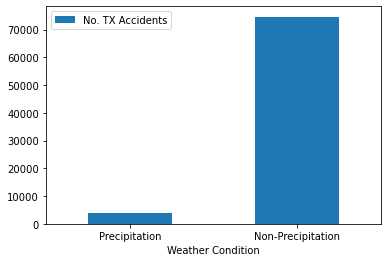

In [34]:
#2019 TX total accidents Precipitation / Non-Precipitation bar graph
tx_total['Precipitation(in)'] = tx_total['Precipitation(in)'].fillna(0)
precip = tx_total['Precipitation(in)'] > 0
precip_wet = tx_total[precip]['Date'].count()
no_precip = tx_total['Precipitation(in)'] == 0
precip_dry = tx_total[no_precip]['Date'].count()
df = pd.DataFrame({'Weather Condition':['Precipitation', 'Non-Precipitation'],'No. TX Accidents':[precip_wet,precip_dry]})
ax = df.plot.bar(x='Weather Condition', y='No. TX Accidents', rot=0)

Text(0.5, 1.0, 'Accidents vs Weather Conditions in Houston, Tx')

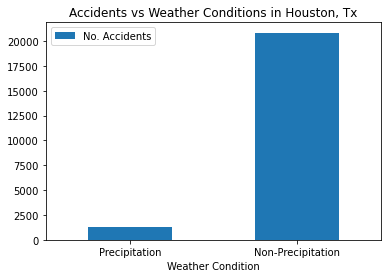

In [35]:
#2019 Houston, TX total accidents Precipitation / Non-Precipitation bar graph
houston_df['Precipitation(in)'] = houston_df['Precipitation(in)'].fillna(0)
precip = houston_df['Precipitation(in)'] > 0
precip_wet = houston_df[precip]['Date'].count()
no_precip = houston_df['Precipitation(in)'] == 0
precip_dry = houston_df[no_precip]['Date'].count()
df = pd.DataFrame({'Weather Condition':['Precipitation', 'Non-Precipitation'],'No. Accidents':[precip_wet,precip_dry]})
ax = df.plot.bar(x='Weather Condition', y='No. Accidents', rot=0)
plt.title('Accidents vs Weather Conditions in Houston, Tx')

In [36]:
#Houston,Tx Precipitation / Non-Precipitation Chi-Square
htownprecipdays = 90
htownnonprecipdays = 275
htownprecipexp = (htownprecipdays / 365) * htown_total
htownnonprecipexp = (htownnonprecipdays / 365) * htown_total
observed = pd.Series([precip_wet, precip_dry], index=['Precipitation','Non-Precipitation'])
df = pd.DataFrame([observed]).T
df[1] = 0
df.columns = ['observed','expected']
df.loc['Precipitation','expected'] = round(htownprecipexp, 2)
df.loc['Non-Precipitation','expected'] = round(htownnonprecipexp, 2)
df
df.head()
critical_value = sts.chi2.ppf(q=0.95, df = 1)
critical_value
sts.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=4151.94854103311, pvalue=0.0)

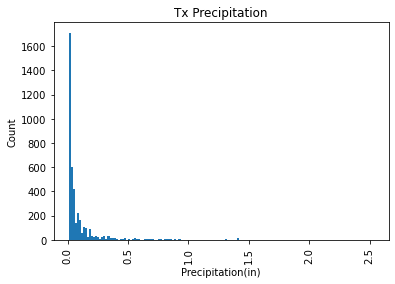

Mean: 0.09401328740157235
Median: 0.03
Mode: 0    0.01
dtype: float64


In [37]:
#TX Precipitation Histogram
precipitation = tx_total[tx_total["Precipitation(in)"] > 0]
precipitation = precipitation["Precipitation(in)"]
plt.hist(precipitation, bins = 150)
plt.title('Tx Precipitation')
plt.xlabel('Precipitation(in)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

mean = precipitation.mean()
median = precipitation.median()
mode = precipitation.mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

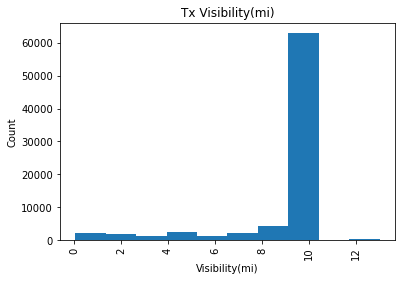

Mean: 9.09133900553601
Median: 10.0
Mode: 0    10.0
dtype: float64


In [38]:
#TX Visability Histogram
vis = tx_total[tx_total["Visibility(mi)"] > 0]
vis = vis["Visibility(mi)"]
plt.hist(vis)
plt.title('Tx Visibility(mi)')
plt.xlabel('Visibility(mi)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

mean = vis.mean()
median = vis.median()
mode = vis.mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

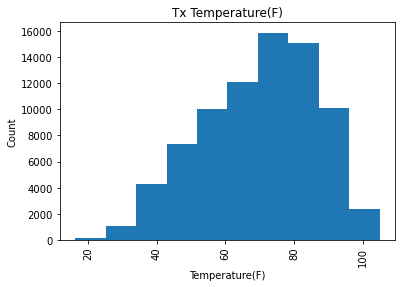

Mean: 69.87326996682971
Median: 72.0
Mode: 0    77.0
dtype: float64


In [39]:
#TX Temperature Histogram
temp = tx_total[tx_total["Temperature(F)"] > -20]
temp = temp["Temperature(F)"]
plt.hist(temp)
plt.title('Tx Temperature(F)')
plt.xlabel('Temperature(F)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

mean = temp.mean()
median = temp.median()
mode = temp.mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

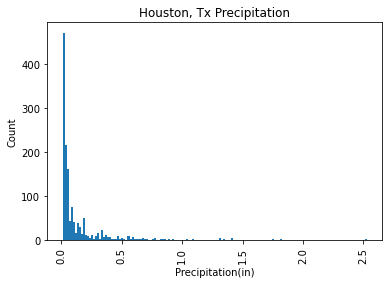

Mean: 0.11200601051840771
Median: 0.04
Mode: 0    0.01
dtype: float64


In [40]:
#Houston Precipitation Histrogram
precipitation = houston_df[houston_df["Precipitation(in)"] > 0]
precipitation = precipitation["Precipitation(in)"]
plt.hist(precipitation, bins = 150)
plt.title('Houston, Tx Precipitation')
plt.xlabel('Precipitation(in)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

mean = precipitation.mean()
median = precipitation.median()
mode = precipitation.mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

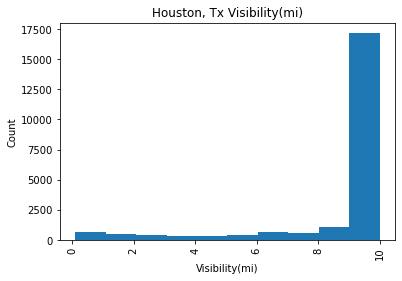

Mean: 8.96165335499309
Median: 10.0
Mode: 0    10.0
dtype: float64


In [41]:
#Houston Visability Histogram
vis = houston_df[houston_df["Visibility(mi)"] > 0]
vis = vis["Visibility(mi)"]
plt.hist(vis)
plt.title('Houston, Tx Visibility(mi)')
plt.xlabel('Visibility(mi)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

mean = vis.mean()
median = vis.median()
mode = vis.mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

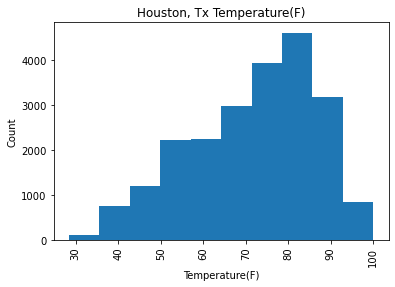

Mean: 71.64065253739383
Median: 75.0
Mode: 0    81.0
dtype: float64


In [42]:
#TX Temperature Histogram
temp = houston_df[houston_df["Temperature(F)"] > -20]
temp = temp["Temperature(F)"]
plt.hist(temp)
plt.title('Houston, Tx Temperature(F)')
plt.xlabel('Temperature(F)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

mean = temp.mean()
median = temp.median()
mode = temp.mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

In [43]:
#2019 Stats for US, TX, and Houston, TX
us_2019_stats = accident_df.describe()
tx_2019_stats = tx_total.describe()
htown_2019_stats = houston_df.describe()

In [44]:
#Spring Stats for US, TX and Houston, TX
us_spring_stats = spring_dates_df.describe()
tx_spring_stats = tx_spring.describe()
htown_spring_stats = htown_spring_dates_df.describe()

In [45]:
#Summer Stats for US, TX and Houston, TX
us_summer_stats = summer_dates_df.describe()
tx_summer_stats = tx_summer.describe()
htown_summer_stats = htown_summer_dates_df.describe()

In [46]:
#Fall Stats for US, TX and Houston, TX
us_fall_stats = fall_dates_df.describe()
tx_fall_stats = tx_fall.describe()
htown_fall_stats = htown_fall_dates_df.describe()

In [47]:
#Winter Stats for US, TX and Houston, TX
us_winter_stats = winter.describe()
tx_winter_stats = tx_winter.describe()
htown_winter_stats = htown_winter.describe()